# Breast Cancer Dataset

Binary Classification Prediction for type of Breast Cancer

https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset?resource=download

In [1]:
!pip install scikit-learn
!pip install pandas

In [2]:
import pandas as pd
from glob import glob

for g in glob('./*'):
    print(g)

df = pd.read_csv('./chap01/data/breast-cancer.csv')
print(df.shape)
df.head()

./breast_cancer_binary.ipynb
./chap01
(569, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 데이터 전처리

In [3]:
# 비어있는게 있나 
print(df.isnull().sum())


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [4]:
# 이상치 있는지 확인
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
!pip install matplotlib

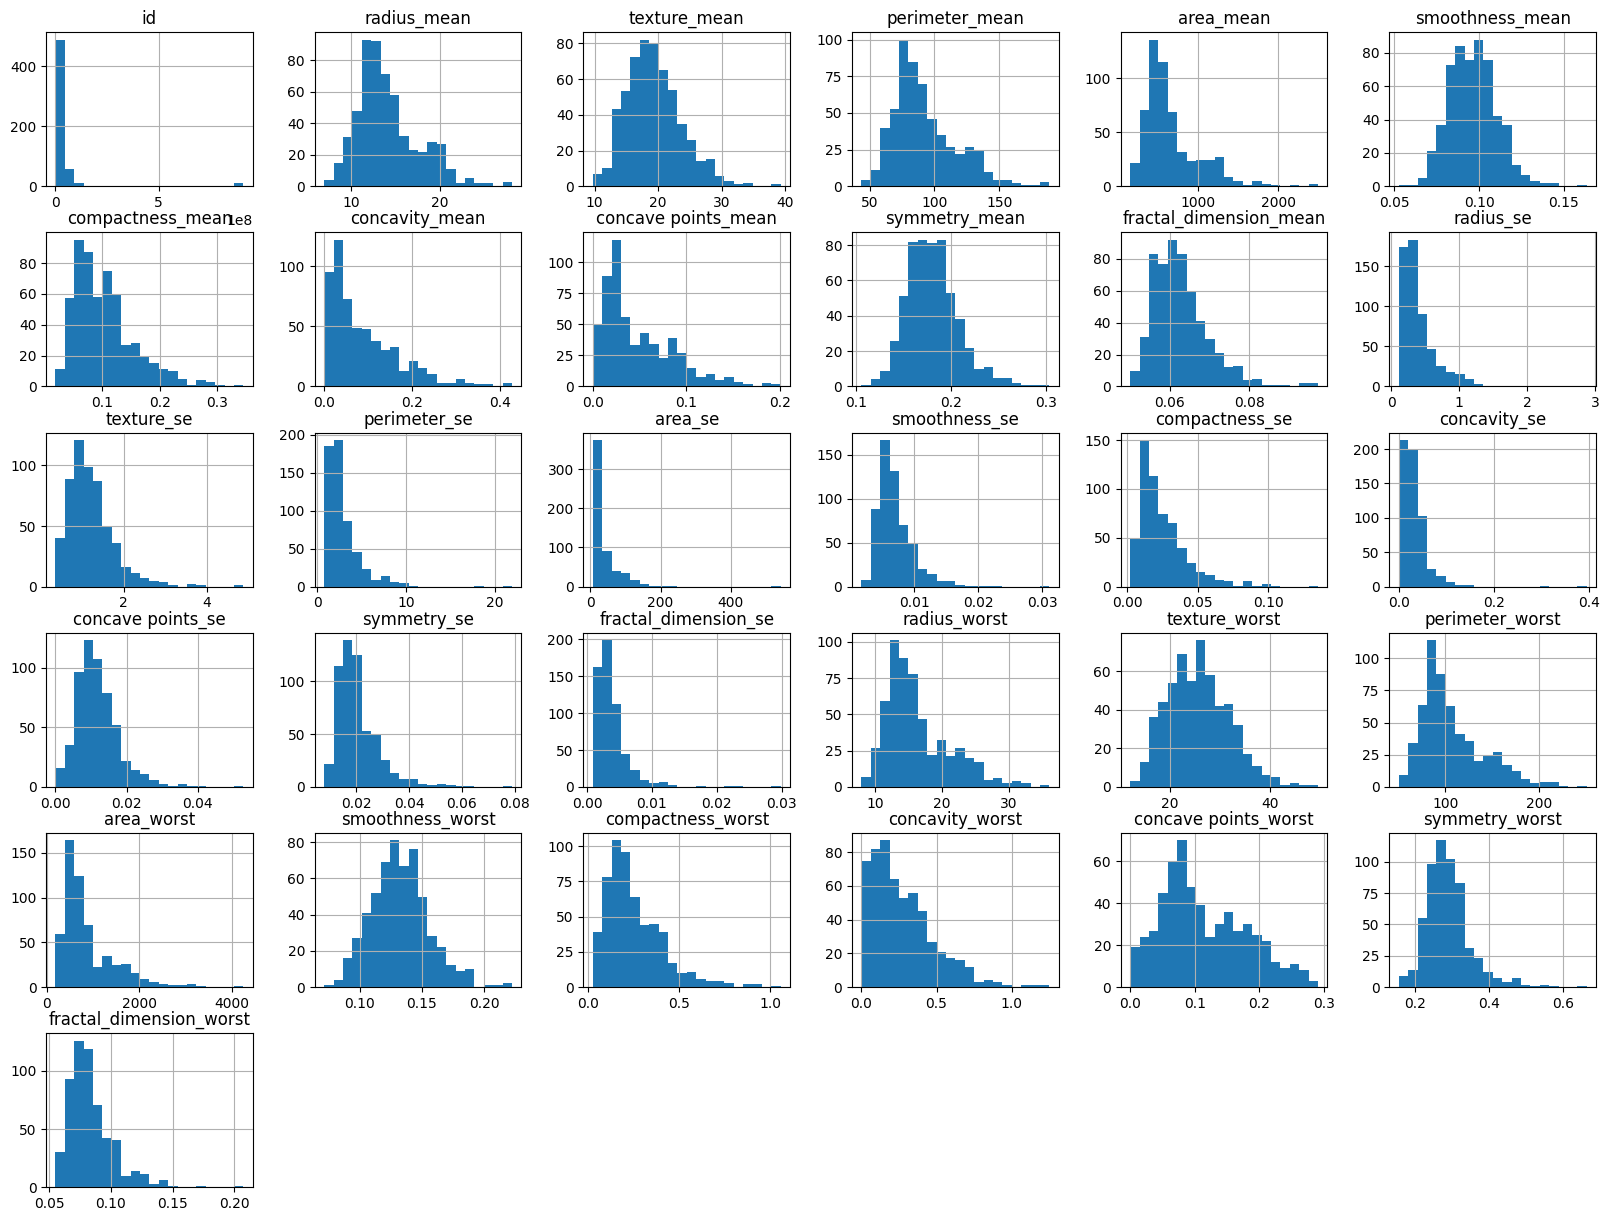

In [6]:
# 전체 데이터 분포 그래프로 확인
import matplotlib.pyplot as plt

df.hist(bins=20, figsize=(20, 15))
plt.show()

# 이상치는 없는 것 같다. 

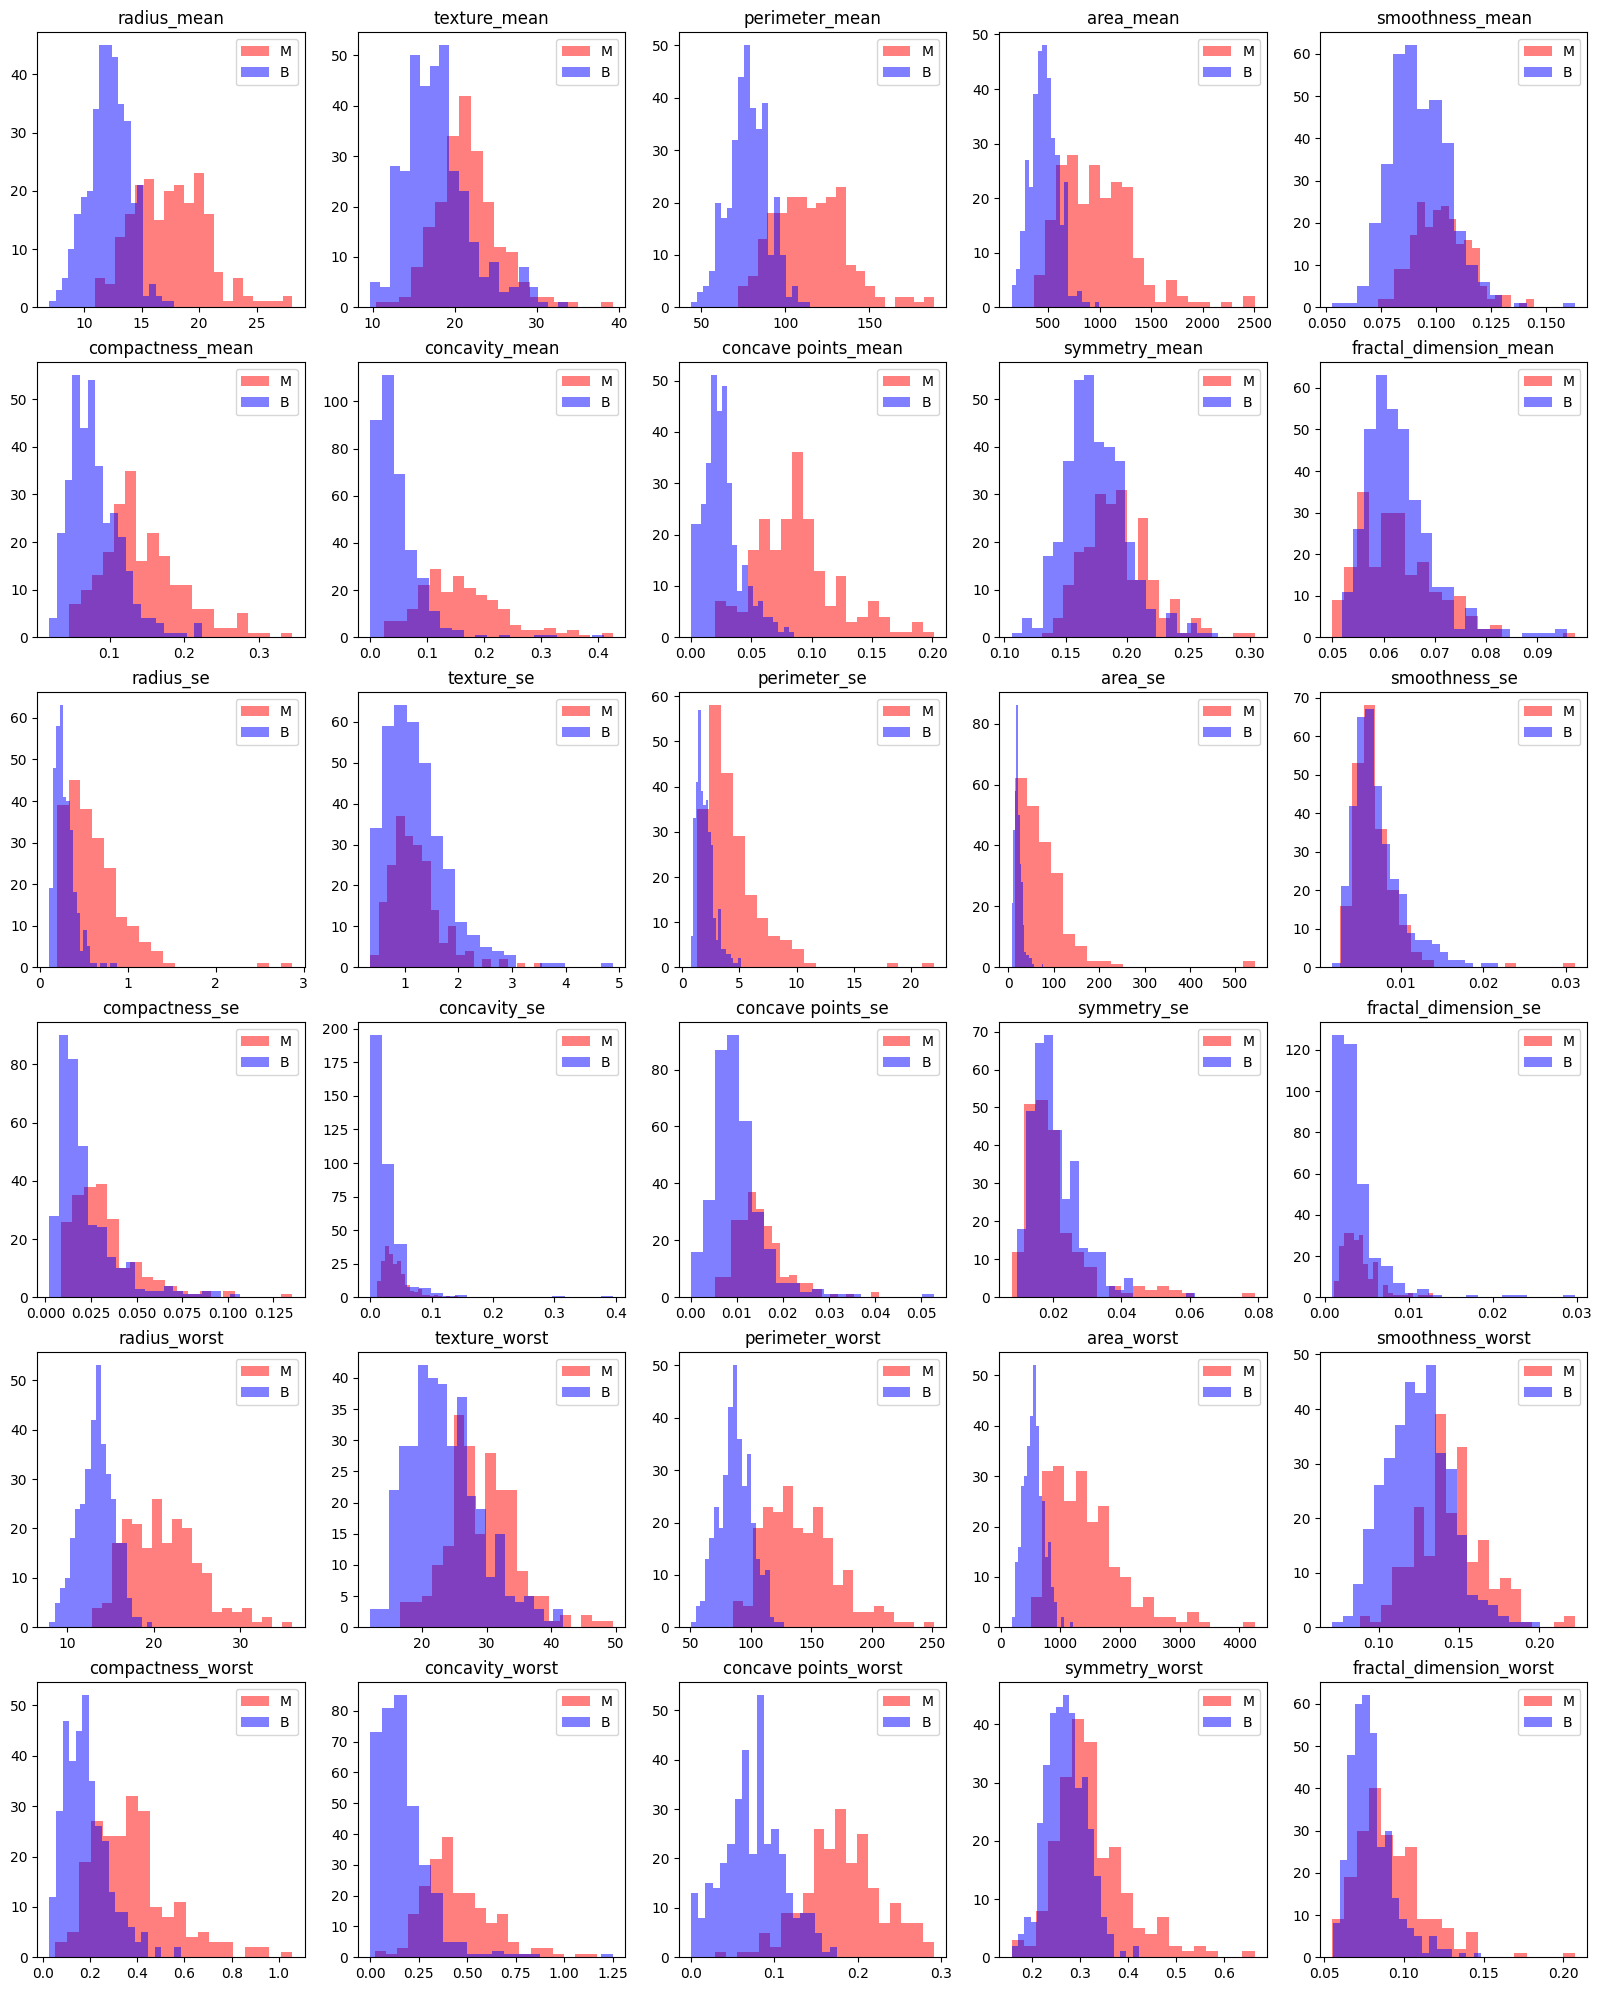

In [7]:
# 양성, 음성으로 나눠 데이터 분포 확인

df_m = df[df['diagnosis'] == 'M']
df_b = df[df['diagnosis'] == 'B']

plt.figure(figsize=(20, 25))
for i, feature in enumerate(df.columns[2:32]):
    plt.subplot(6, 5, i+1)
    plt.hist(df_m[feature], bins=20, color='r', alpha=0.5, label='M')
    plt.hist(df_b[feature], bins=20, color='b', alpha=0.5, label='B')
    plt.legend()
    plt.title(feature)


diagnosis
B    357
M    212
Name: count, dtype: int64


<BarContainer object of 2 artists>

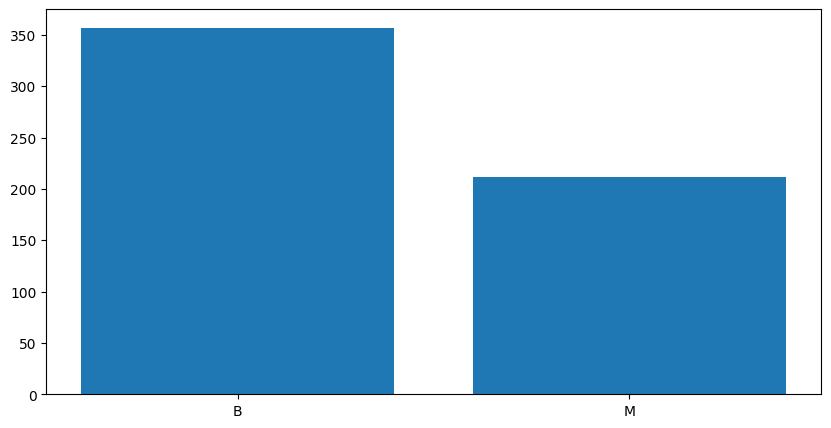

In [8]:
# M과 B의 숫자 확인

print(df['diagnosis'].value_counts())

plt.figure(figsize=(10, 5))
plt.bar(df['diagnosis'].value_counts().index, df['diagnosis'].value_counts().values)

In [9]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.9 MB/s eta 0:00:003.0 MB/s eta 0:00:01


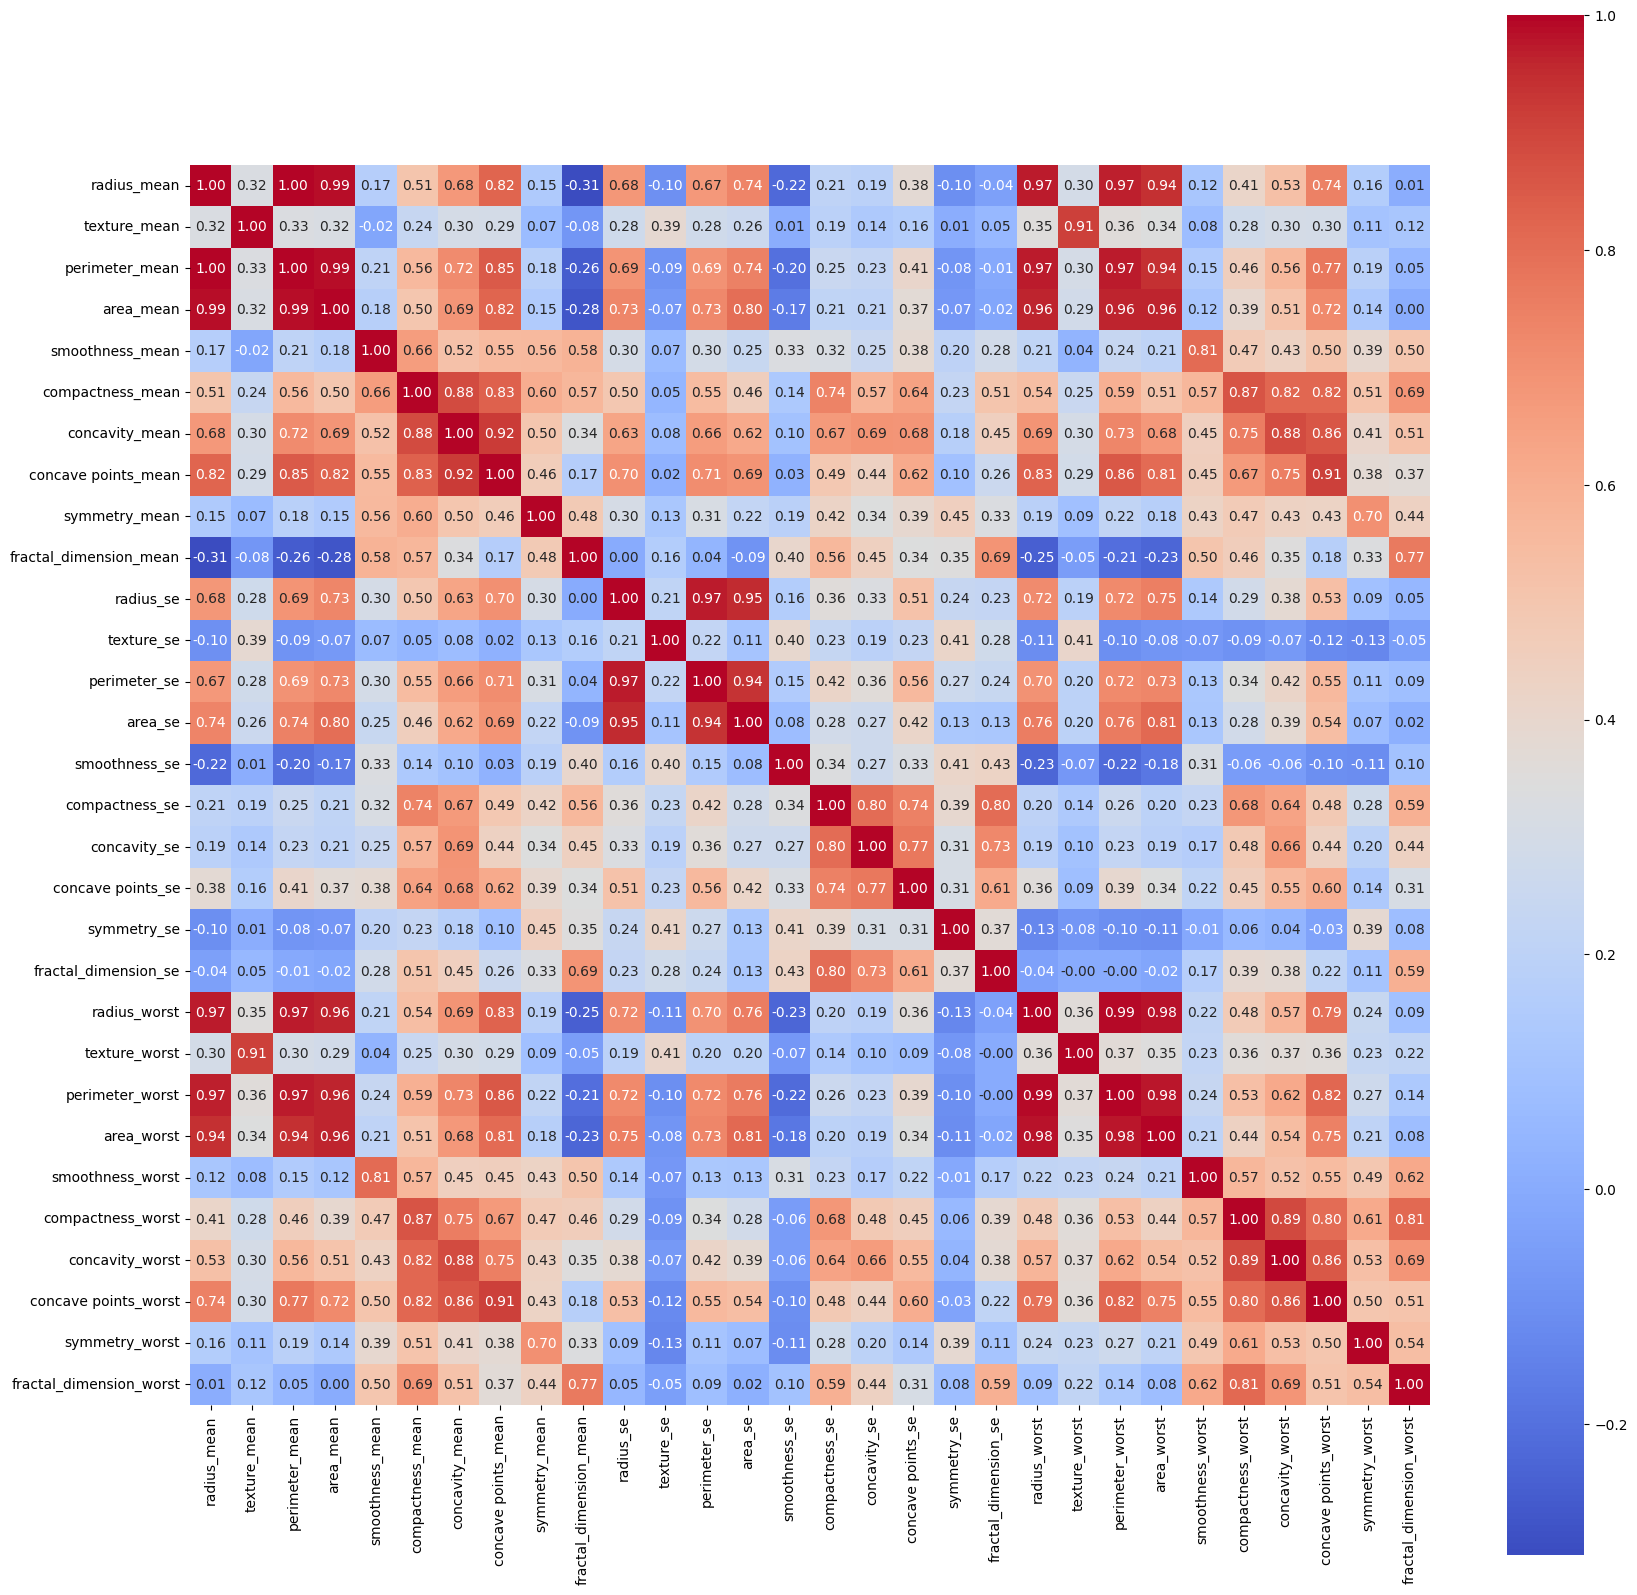

In [10]:
import seaborn as sns

plt.figure(figsize=(20, 20))

sns.heatmap(df.drop(columns=['id', 'diagnosis']).corr(), annot=True, fmt='.2f', square=True, cmap='coolwarm')
plt.show()





다중 공선성을 처리해야 하는 변수들이 좀 보인다. 

일단은 무시하고 가보자. (knn 쓸거라서 나중에 그냥 정규화 하면 큰 문제 없음)

In [11]:
df['diagnosis_bin'] = df['diagnosis'].map({'M': 1, 'B': 0})

df.drop(columns=['id', 'diagnosis'], inplace=True)

In [12]:
df_origin = df.copy()



df_features = df.drop(columns=['diagnosis_bin'])
df_target = df['diagnosis_bin']


display(df_features.head())

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=5)

kn.fit(df_features, df_target)

KNeighborsClassifier()

In [14]:
kn.score(df_features, df_target)

0.9472759226713533

In [15]:
df['predicted_with_all_features'] = kn.predict(df_features)
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_bin,predicted_with_all_features
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1,1


In [16]:
# 상관관계가 제일 높은 feature 2개는 뭐였을까? 
df.corr()['diagnosis_bin'].sort_values(ascending=False)

diagnosis_bin                  1.000000
predicted_with_all_features    0.886841
concave points_worst           0.793566
perimeter_worst                0.782914
concave points_mean            0.776614
radius_worst                   0.776454
perimeter_mean                 0.742636
area_worst                     0.733825
radius_mean                    0.730029
area_mean                      0.708984
concavity_mean                 0.696360
concavity_worst                0.659610
compactness_mean               0.596534
compactness_worst              0.590998
radius_se                      0.567134
perimeter_se                   0.556141
area_se                        0.548236
texture_worst                  0.456903
smoothness_worst               0.421465
symmetry_worst                 0.416294
texture_mean                   0.415185
concave points_se              0.408042
smoothness_mean                0.358560
symmetry_mean                  0.330499
fractal_dimension_worst        0.323872


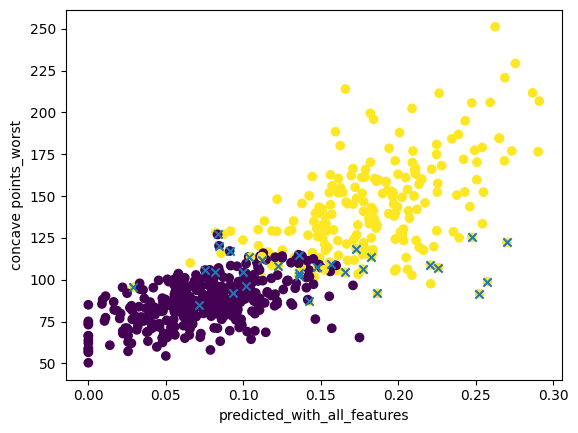

In [17]:
# concave points_worst와 perimeter_worst을 x, y로 scatter plot 그리자. 
# 색상은 diagnosis_bin으로 구분
# predicted_with_all_features와 diagnosis_bin의 값이 다른 곳은 표시를 하자.

plt.scatter(df['concave points_worst'], df['perimeter_worst'], c=df['diagnosis_bin'])
plt.scatter(
    df[df['diagnosis_bin'] != df['predicted_with_all_features']]['concave points_worst'],
    df[df['diagnosis_bin'] != df['predicted_with_all_features']]['perimeter_worst'],
    marker='x',
)
plt.ylabel('perimeter_worst')
plt.xlabel('concave points_worst')
plt.show()

## train, test set을 나눠야 한다. 

In [18]:
from sklearn.model_selection import train_test_split

df_features = df.drop(columns=['diagnosis_bin', 'predicted_with_all_features'])

X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2, random_state=42, stratify=df_target)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

print(y_train.value_counts(), y_train.value_counts() / y_train.shape[0] * 100)
print(y_test.value_counts(), y_test.value_counts() / y_test.shape[0] * 100)

(455, 30) (114, 30) (455,) (114,)
diagnosis_bin
0    285
1    170
Name: count, dtype: int64 diagnosis_bin
0    62.637363
1    37.362637
Name: count, dtype: float64
diagnosis_bin
0    72
1    42
Name: count, dtype: int64 diagnosis_bin
0    63.157895
1    36.842105
Name: count, dtype: float64


In [19]:
# normalize
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# X_train_scaled 에 컬럼명 부여하기
df_X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
df_X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [21]:
# pairplot 해보자. 
# df_train = pd.DataFrame(X_train_scaled, columns=df_features.columns)
# df_train['diagnosis_bin'] = y_train

# sns.pairplot(df_train, hue='diagnosis_bin')
# plt.show()

In [22]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 4.7 MB/s eta 0:00:00m eta 0:00:01:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 6.5 MB/s eta 0:00:007.2 MB/s eta 0:00:01


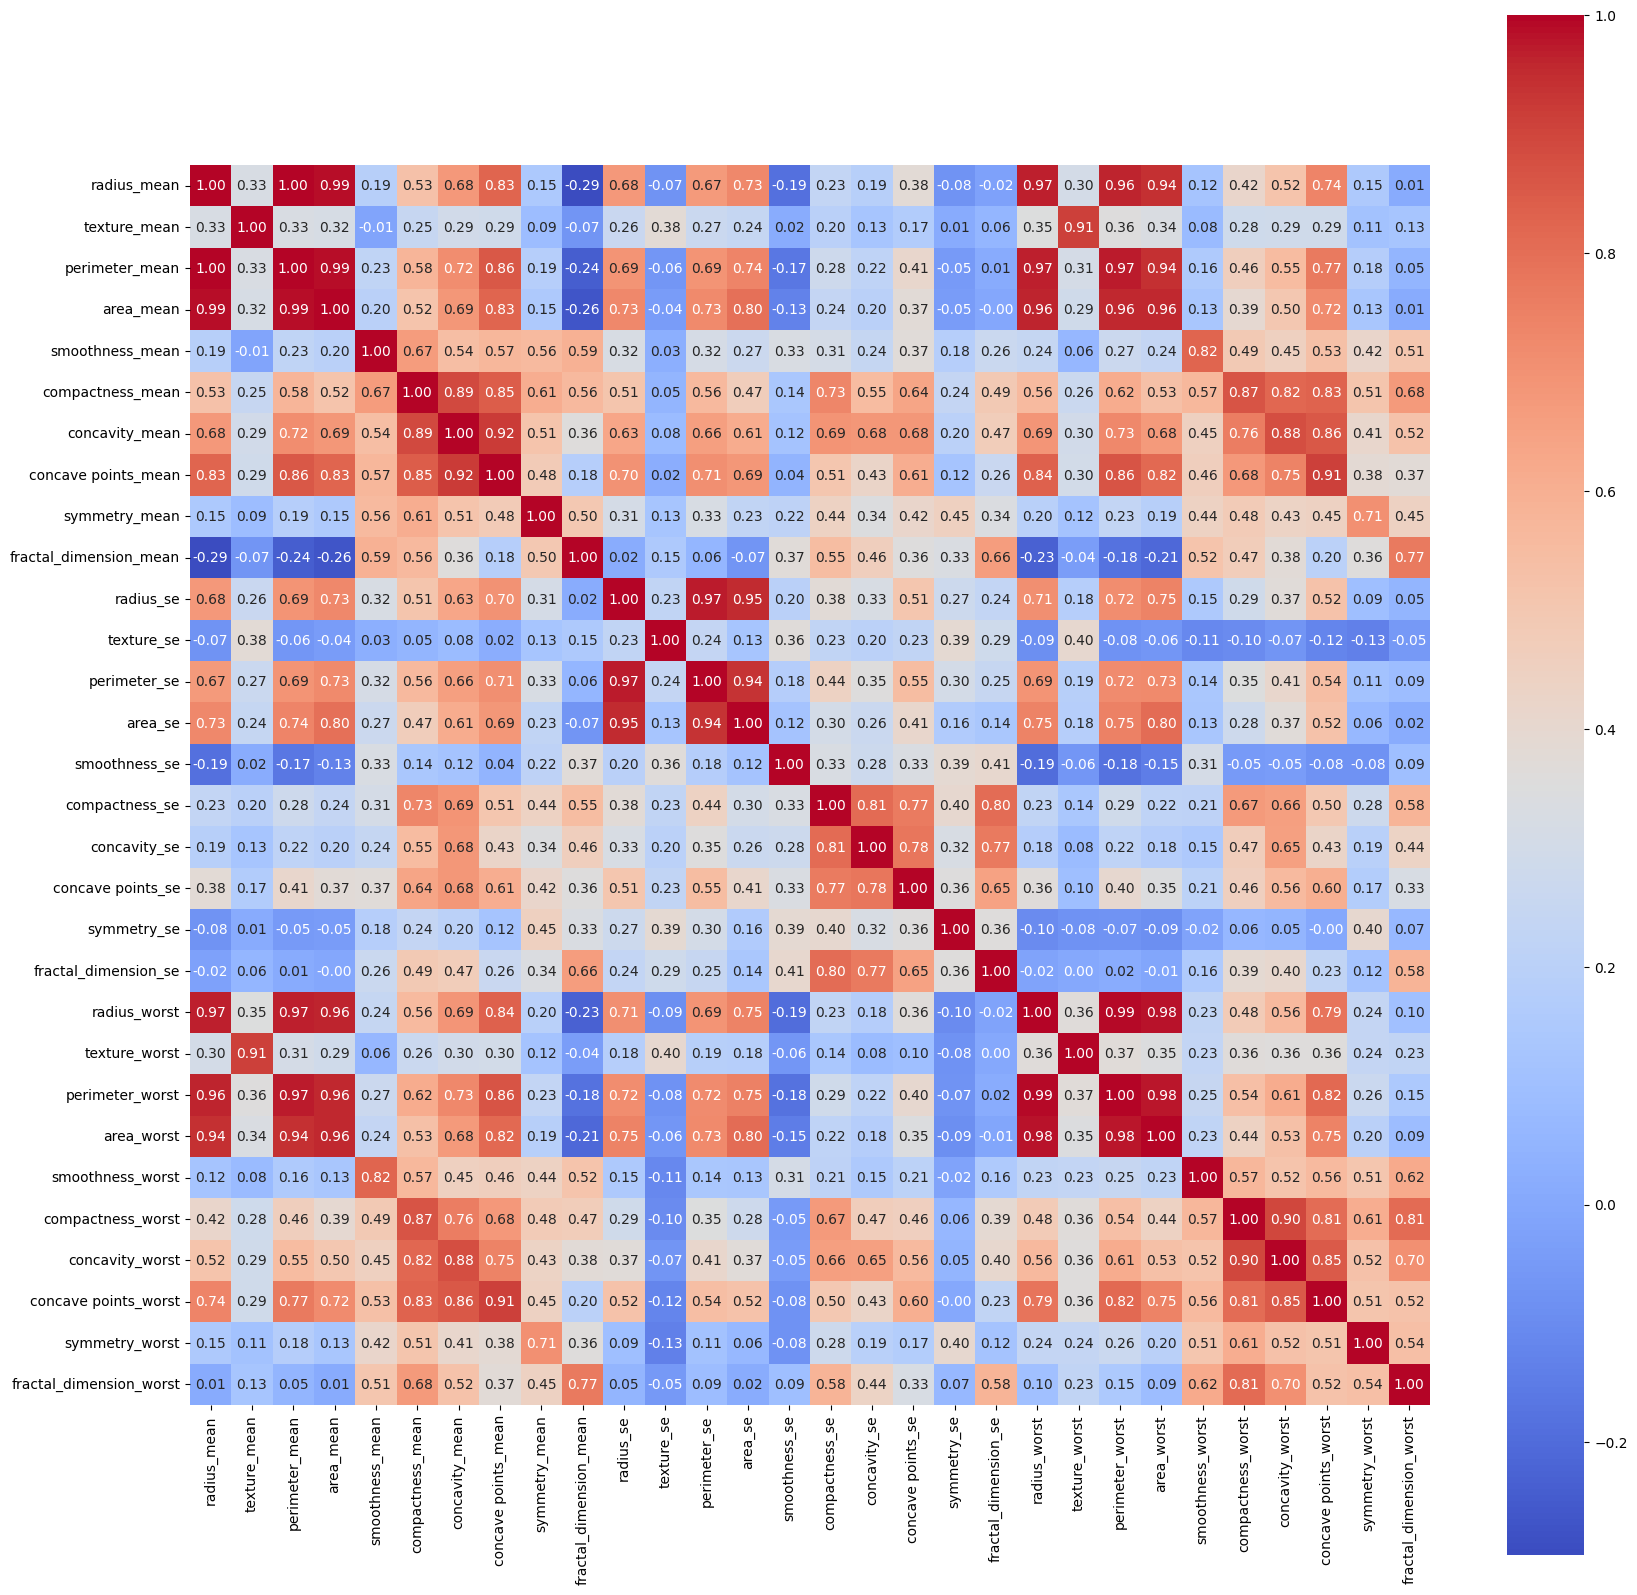

In [23]:
# correlation heatmap (사실 knn 쓸거면 정규화하면 되니까. heatmap 불필요하긴 하다.)

plt.figure(figsize=(20, 20))
sns.heatmap(
    pd.DataFrame(X_train_scaled, columns=df_features.columns).corr(), annot=True, fmt='.2f', square=True, cmap='coolwarm'
)
plt.show()

In [24]:
kn = KNeighborsClassifier(n_neighbors=5)

kn.fit(X_train_scaled, y_train)
kn.score(X_train_scaled, y_train)

0.978021978021978

In [25]:
kn.score(X_test_scaled, y_test)

0.956140350877193

In [26]:
# train set에서 score가 높은데 test set에서 낮다. overfitting이 일어났다.
# 이를 해결하기 위해 feature selection을 해보자.

from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=5)
selector.fit(X_train_scaled, y_train)

X_train_scaled_selected = selector.transform(X_train_scaled)
X_test_scaled_selected = selector.transform(X_test_scaled)

X_train_scaled_selected.shape, X_test_scaled_selected.shape

((455, 5), (114, 5))

In [27]:
selected_features = df_features.columns[selector.get_support()]
selected_features


Index(['perimeter_mean', 'concave points_mean', 'radius_worst',
       'perimeter_worst', 'concave points_worst'],
      dtype='object')

In [28]:
kn_selected = KNeighborsClassifier(n_neighbors=5)
kn_selected.fit(X_train_scaled_selected, y_train)
kn_selected.score(X_train_scaled_selected, y_train)

0.9516483516483516

In [29]:
kn_selected.score(X_test_scaled_selected, y_test)

0.956140350877193

In [30]:
df_X_test_scaled_selected = pd.DataFrame(X_test_scaled_selected, columns=selected_features)
print(df_X_test_scaled_selected.shape)
print(y_test.shape)
df_X_test_scaled_selected['diagnosis_bin'] = y_test.values
df_X_test_scaled_selected['predicted_with_selected_features'] = kn_selected.predict(X_test_scaled_selected)
df_X_test_scaled_selected.head()


(114, 5)
(114,)


,perimeter_mean,concave points_mean,radius_worst,perimeter_worst,concave points_worst,diagnosis_bin,predicted_with_selected_features
0,-0.764517,-0.574754,-0.721358,-0.706549,-0.388057,0,0
1,1.890816,2.068127,1.885038,1.682546,1.422926,1,1
2,0.570440,0.125003,0.126334,0.153478,0.143916,0,0
3,0.091703,0.236500,-0.004395,0.048026,0.614184,1,1
4,-0.237986,-0.413058,-0.265851,-0.327211,-0.567029,0,0


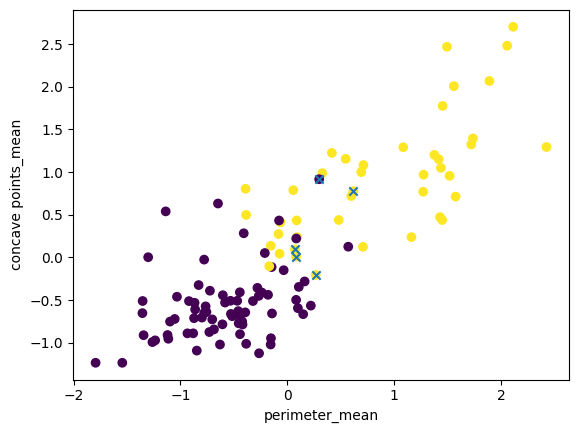

In [31]:
# predicted_with_selected_features와 diagnosis_bin의 값이 다른 곳은 표시를 하자.
# perimeter_mean 와 concave points_mean 을 x, y로 scatter plot 그리자.
# 색상은 diagnosis_bin으로 구분

plt.scatter(df_X_test_scaled_selected['perimeter_mean'], df_X_test_scaled_selected['concave points_mean'], c=df_X_test_scaled_selected['diagnosis_bin'])
plt.scatter(
    df_X_test_scaled_selected[df_X_test_scaled_selected['diagnosis_bin'] != df_X_test_scaled_selected['predicted_with_selected_features']]['perimeter_mean'],
    df_X_test_scaled_selected[df_X_test_scaled_selected['diagnosis_bin'] != df_X_test_scaled_selected['predicted_with_selected_features']]['concave points_mean'],
    marker='x',
)
plt.xlabel('perimeter_mean')
plt.ylabel('concave points_mean')
plt.show()

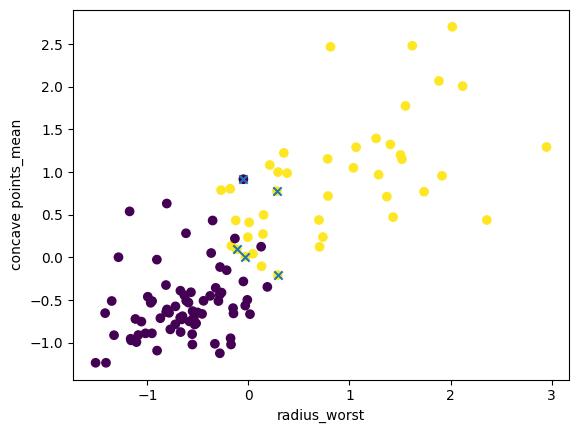

In [32]:

plt.scatter(df_X_test_scaled_selected['radius_worst'], df_X_test_scaled_selected['concave points_mean'], c=df_X_test_scaled_selected['diagnosis_bin'])
plt.scatter(
    df_X_test_scaled_selected[df_X_test_scaled_selected['diagnosis_bin'] != df_X_test_scaled_selected['predicted_with_selected_features']]['radius_worst'],
    df_X_test_scaled_selected[df_X_test_scaled_selected['diagnosis_bin'] != df_X_test_scaled_selected['predicted_with_selected_features']]['concave points_mean'],
    marker='x',
)
plt.xlabel('radius_worst')
plt.ylabel('concave points_mean')
plt.show()

In [33]:
# 암이 아닌데, 맞는 것 같다고 판단하는건 다른 검사 해보면 되는데, 
# 암인데, 암이 아니라고 판단하고 넘어가면 큰일나는 문제이므로, 그에 맞는 평가도 해야 하긴 함. 하지만 이만!